In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split


In [5]:
Happy=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')
Happy

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [6]:
type(Happy)

pandas.core.frame.DataFrame

In [11]:
Happy.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

<AxesSubplot:xlabel='Happiness Rank', ylabel='Economy (GDP per Capita)'>

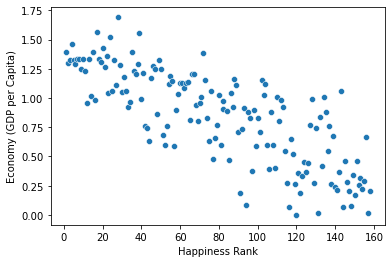

In [13]:
sns.scatterplot(x="Happiness Rank",y="Economy (GDP per Capita)",data=Happy)

<AxesSubplot:xlabel='Happiness Rank', ylabel='Health (Life Expectancy)'>

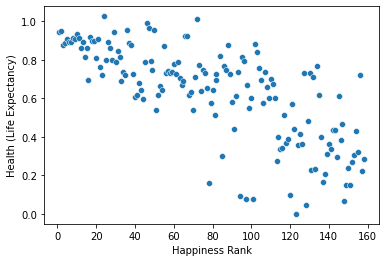

In [14]:
sns.scatterplot(x="Happiness Rank",y="Health (Life Expectancy)",data=Happy)

<AxesSubplot:xlabel='Happiness Rank', ylabel='Country'>

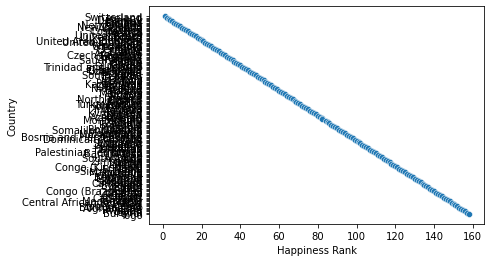

In [15]:
sns.scatterplot(x="Happiness Rank",y="Country",data=Happy)

<AxesSubplot:xlabel='Happiness Rank', ylabel='Family'>

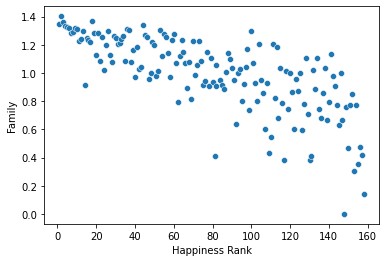

In [20]:
sns.scatterplot(x="Happiness Rank",y="Family",data=Happy)

In [28]:
Happy.skew()

C:\Users\Admin\AppData\Local\Temp/ipykernel_5700/3277076216.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Happy.skew()


Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Happiness Score', ylabel='Density'>

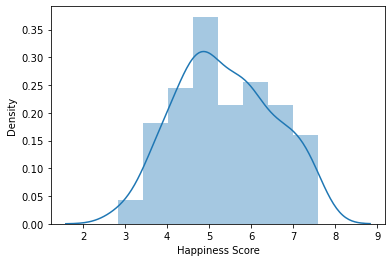

In [29]:
sns.distplot(Happy['Happiness Score'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Density'>

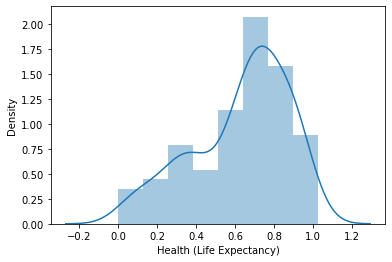

In [30]:
sns.distplot(Happy['Health (Life Expectancy)'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='Density'>

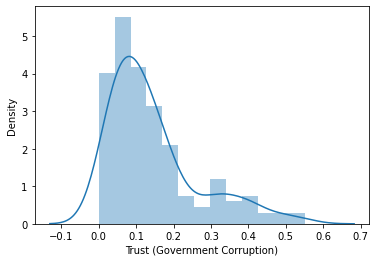

In [38]:
sns.distplot(Happy['Trust (Government Corruption)'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Standard Error', ylabel='Density'>

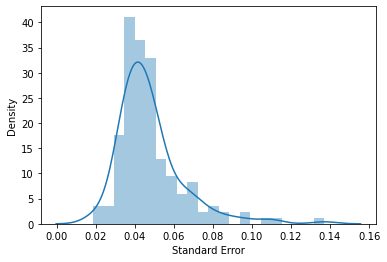

In [39]:
sns.distplot(Happy['Standard Error'])

In [35]:
Happy.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


<AxesSubplot:>

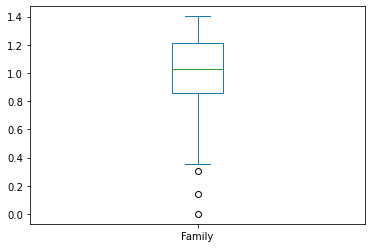

In [31]:
Happy['Family'].plot.box()

<AxesSubplot:>

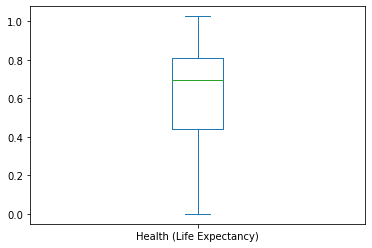

In [32]:
Happy['Health (Life Expectancy)'].plot.box()

Happiness Rank                      AxesSubplot(0.125,0.536818;0.110714x0.343182)
Happiness Score                  AxesSubplot(0.257857,0.536818;0.110714x0.343182)
Standard Error                   AxesSubplot(0.390714,0.536818;0.110714x0.343182)
Economy (GDP per Capita)         AxesSubplot(0.523571,0.536818;0.110714x0.343182)
Family                           AxesSubplot(0.656429,0.536818;0.110714x0.343182)
Health (Life Expectancy)         AxesSubplot(0.789286,0.536818;0.110714x0.343182)
Freedom                                AxesSubplot(0.125,0.125;0.110714x0.343182)
Trust (Government Corruption)       AxesSubplot(0.257857,0.125;0.110714x0.343182)
Generosity                          AxesSubplot(0.390714,0.125;0.110714x0.343182)
Dystopia Residual                   AxesSubplot(0.523571,0.125;0.110714x0.343182)
dtype: object

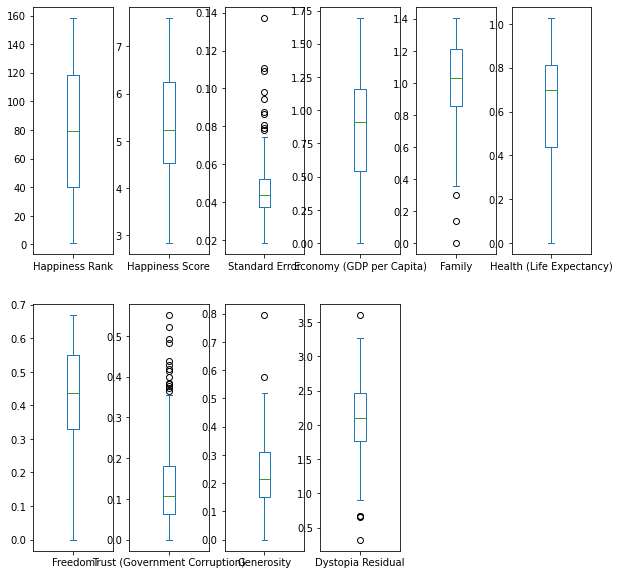

In [33]:
Happy.plot(kind='box',subplots=True,layout=(2,6),figsize=(10,10))

<AxesSubplot:>

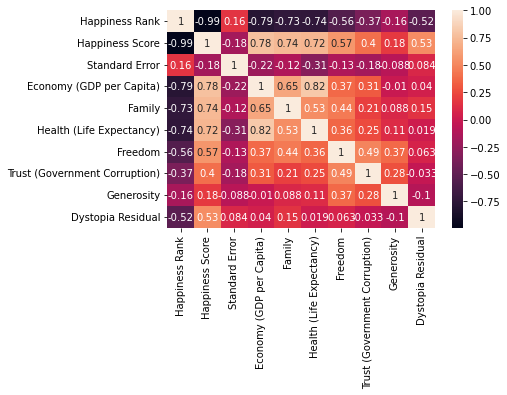

In [37]:
sns.heatmap(Happy.corr(),annot=True)

In [41]:
# REMOVING OUTLIERS:ZSCORE
from scipy.stats import zscore
z=np.abs(zscore(Happy))
z.shape

TypeError: unsupported operand type(s) for /: 'str' and 'int'